In [1]:
from numpy import *
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error

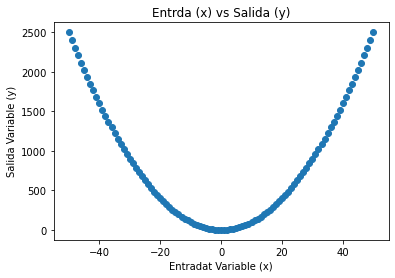

In [2]:
# Definimos los datos de entrada
x = [i for i in range(-50,51)]
# Definimos los datos de salida
y = [i**2.0 for i in x]
# mostramos los datos de salida respecto a los de entrada
pyplot.scatter(x,y)
pyplot.title('Entrda (x) vs Salida (y)')
pyplot.xlabel('Entradat Variable (x)')
pyplot.ylabel('Salida Variable (y)')
pyplot.show()

## Aproximando la función

In [3]:
# define the dataset
x = asarray([i for i in range(-50,51)])
y = asarray([i**2.0 for i in x])
print(x.min(), x.max(), y.min(), y.max())

-50 50 0.0 2500.0


In [4]:
# Se reacomodan los datos en una sola columna esto ayuda al procesamiento de informacion 
# en los modelos de aprendisaje supervisado
x = x.reshape((len(x), 1))
y = y.reshape((len(y), 1))

In [5]:
#Escalamos o normalizamos los datos para evitar problemas en el apredisaje de la NN
scale_x = MinMaxScaler()
x = scale_x.fit_transform(x)
scale_y = MinMaxScaler()
y = scale_y.fit_transform(y)
print(x.min(), x.max(), y.min(), y.max())

0.0 1.0 0.0 1.0


### Creando la red neuronal NN

In [6]:
#Red con 3 capas y 7 nodos  // Red con 2 capas y 10 nodos
model = keras.Sequential()
model.add(layers.Dense(7, input_dim=1, activation='relu', kernel_initializer='he_uniform'))
model.add(layers.Dense(7, activation='relu', kernel_initializer='he_uniform'))
model.add(layers.Dense(7, activation='relu', kernel_initializer='he_uniform'))
model.add(layers.Dense(1, activation='exponential',kernel_initializer='uniform'))

Haremos que el modelo trate de minimizar el error cuadrático medio entre las prediciones realizadas y los valores de salida esperados (y) mienstras intetnta aproximar la función de mapeo.

In [7]:
#Definimos la funcion de perdida y el algoritmo de optimización
model.compile(loss='mse', optimizer='adam')

Como no contamos con demasiados datos podemos ajustar el modelo para 500 épocas y usar un batch size de 10

In [8]:
#Colocamos el modelo y el conjunto de datos de entrenamiento
model.fit(x, y, epochs=700, batch_size=10, verbose=0)

In [9]:
#Hacemos una prediccion 
y_p = model.predict(x)

Debemos invertir la escala que habiamos realizado.

In [10]:
# Se reinvierte la escala
x_plot = scale_x.inverse_transform(x)
y_plot = scale_y.inverse_transform(y)
y_p_plot = scale_y.inverse_transform(y_p)
# Mostramos el error
print('MSE: %.3f' % mean_squared_error(y_plot, y_p_plot))

MSE: 1323.977


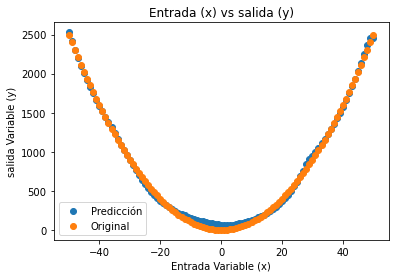

In [11]:
# plot x vs yhat
pyplot.scatter(x_plot,y_p_plot, label='Predicción')


pyplot.scatter(x_plot,y_plot, label='Original')
pyplot.title('Entrada (x) vs salida (y)')
pyplot.xlabel('Entrada Variable (x)')
pyplot.ylabel('salida Variable (y)')

pyplot.legend()
pyplot.show()

In [27]:
scores = model.evaluate(x_plot, y_plot)
print(model.metrics_names)
#print("%s: %.2f%%" % (model.metrics_names[0],scores[0]*100))
#print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

4/4 [==============================] - 0s 2ms/step - loss: 1298809.6250
['loss']
